In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [172]:
!ls ../build

!wc -l energyHistogram*

CMakeCache.txt				main
CMakeFiles				Makefile
cmake_install.cmake			MSISE00_atmosphere.csv
empty.txt				photon_data_forward_100keV_1e6.csv
energyHistogram_proton10000keV_1e5.txt	runBeamOn_forward.mac
energyHistogram_proton1000keV_1e5.txt	runBeamOn_inverse_call.mac
energyHistogram_proton20000keV_1e5.txt	runBeamOn_inverse.mac
energyHistogram_proton5000keV_1e5.txt	runBeamOn.mac
G4History.macro				show_spectra.py
init_vis.mac				vis.mac
loopCall.mac
wc: 'energyHistogram*': No such file or directory


# GEANT4 Proton Precipitation Simulation
- Proton kinetic energy: {1, 5, 10, 50} MeV (each simulation using a monoenergetic distribution)
- Pitch Angle distribution: sin($\alpha$) , $\alpha \in [0^\circ, 50^\circ]$
- Starting altitude: 500 km
- Particles per simulation: 10$^5$ protons/sim

In [176]:
def averageHistogramArray(data):
    '''
    Finds the average energy array and energy deviation array with altitude
    '''
    lineLen = 1000;
    energyArr = np.zeros(lineLen);
    devArr    = np.zeros(lineLen);
    
    # Sum(X_i)
    for i in range(0, int(len(data)/lineLen)):
        energyArr += data.E.values[lineLen * i:lineLen * (i+1)]

    # 1/N
    energyArr /= (len(data)/lineLen)

    # Sum(X_i - 1/N Sum(X_i))
    for i in range(0, int(len(data)/lineLen)):    
        devArr    += (data.E.values[lineLen * i:lineLen * (i+1)] - energyArr)**2
    
    # 1/(N-1)
    devArr    /= (len(data)/lineLen)-1
    
    return energyArr, devArr;

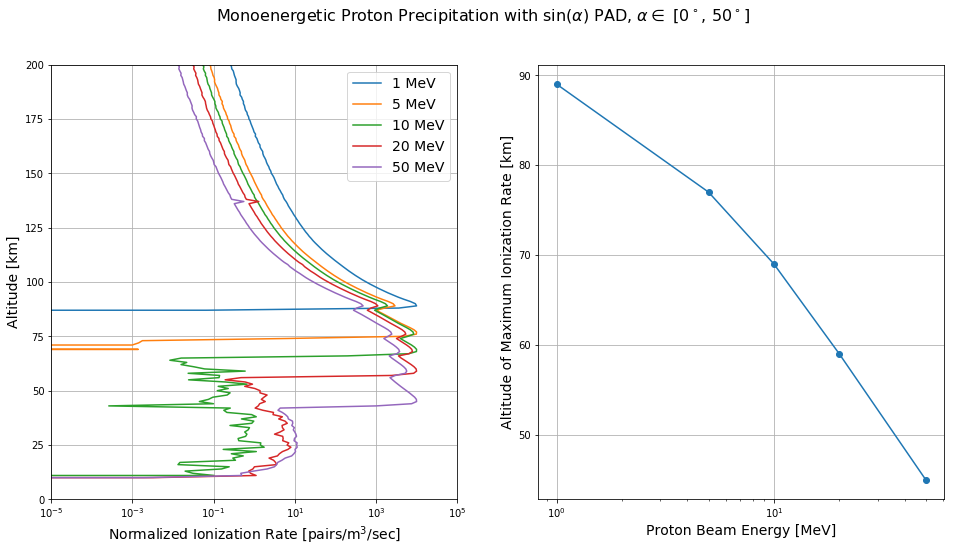

In [179]:
# Altitude array in kilometers
h        = np.linspace(0, 999, 1000);
energies = [1000, 5000, 10000, 20000, 50000] # energies in keV

Nparticles = 1e5;

# Allocate arrays
energyHist    = np.zeros([1000, len(energies)])
energyDevHist = np.zeros([1000, len(energies)])

hMaxArr = np.zeros(len(energies));
# Read in data
for ind, i in enumerate(energies):
    data = pd.read_csv('../build/energyHistogram_proton%.0fkeV_1e5.txt' % i, names=['E']);
    energyHist[:,ind], energyDevHist[:,ind] = averageHistogramArray(data);
    hMaxArr[ind] = h[np.argmax(energyHist[:,ind])];
    
    energyHist[:,ind] /= np.max(energyHist[:,ind])/1e9
    energyDevHist[:,ind] /= np.max(energyDevHist[:,ind])/1e9

energyHist /= Nparticles;

# Plot results    
plt.figure(figsize=(16, 8)); plt.subplot(1,2,1); plt.grid();
for i in range(0, len(energies)):
    plt.plot(energyHist[:,i], h, label='%.0f MeV' % (energies[i]/1000));

plt.ylabel('Altitude [km]', fontsize=14);
plt.xlabel('Normalized Ionization Rate [pairs/m$^{3}$/sec]', fontsize=14);
plt.suptitle('Monoenergetic Proton Precipitation with sin($\\alpha$) PAD, \
$\\alpha \in$ [0$^\circ$, 50$^\circ$]', fontsize=16);
plt.legend(fontsize=14); plt.xscale('log');
plt.ylim([0, 200]);
plt.xlim([1e-5, 1e5])

plt.subplot(1,2,2); plt.grid();
plt.plot(np.divide(energies,1000), hMaxArr, 'o-');
plt.yscale('linear'); plt.xscale('log');
plt.xlabel('Proton Beam Energy [MeV]',fontsize=14);
plt.ylabel('Altitude of Maximum Ionization Rate [km]',fontsize=14);

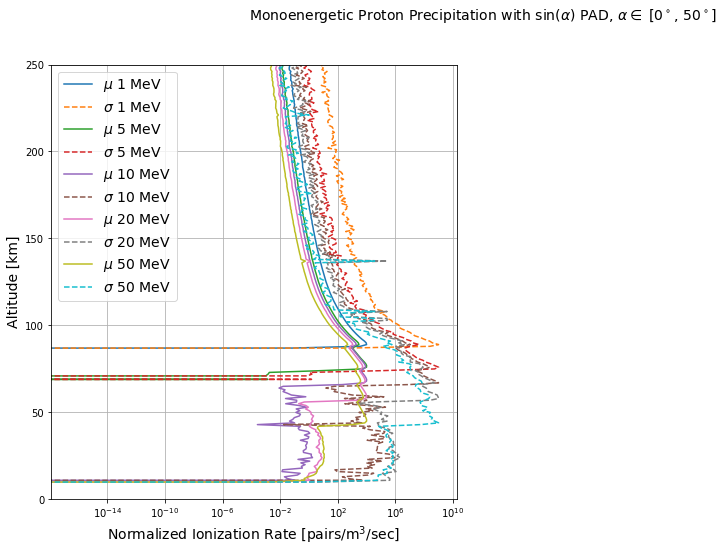

In [180]:
# Plot results    
plt.figure(figsize=(16, 8)); plt.subplot(1,2,1); plt.grid();
for i in range(0, len(energies)):
    plt.plot(energyHist[:,i], h, label='$\mu$ %.0f MeV' % (energies[i]/1000))
    plt.plot(energyDevHist[:,i], h, '--', label='$\sigma$ %.0f MeV' % (energies[i]/1000));

plt.ylabel('Altitude [km]', fontsize=14);
plt.xlabel('Normalized Ionization Rate [pairs/m$^{3}$/sec]', fontsize=14);
plt.suptitle('Monoenergetic Proton Precipitation with sin($\\alpha$) PAD, \
$\\alpha \in$ [0$^\circ$, 50$^\circ$]', fontsize=14);
plt.legend(fontsize=14); plt.xscale('log');
plt.ylim([0, 250]);